In [2]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from qutip import Qobj, sigmax, sigmaz, basis, mesolve, expect, Bloch3d, Bloch
import qutip

%matplotlib inline

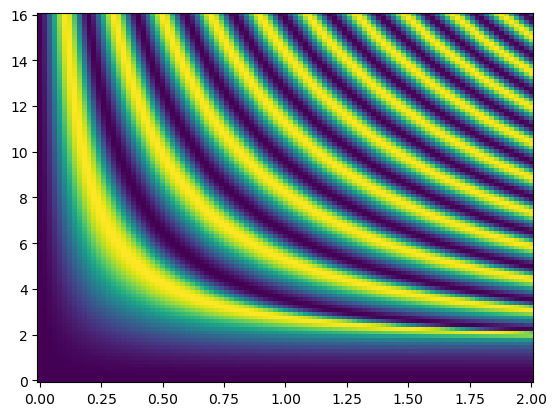

In [3]:
Delta = 0
gamma_e = 6.7
gamma_f = 0.25
t_list = np.linspace(0,2,101)
J_list = np.linspace(0,16,100)
t_grid, J_grid = np.meshgrid(t_list, J_list)
P_grid = np.zeros(J_grid.shape)


for J_idx, J in enumerate(J_list):
    H = J*sigmax()+(Delta-1j*(gamma_e-gamma_f)/2)*Qobj([[1, 0],[0, 0]])
    psi0 = basis(2,1)
    result = mesolve(H, psi0, t_list, [], [])
    P_grid[J_idx, :] = expect(sigmaz(),result.states)

plt.pcolormesh(t_grid,J_grid,P_grid)

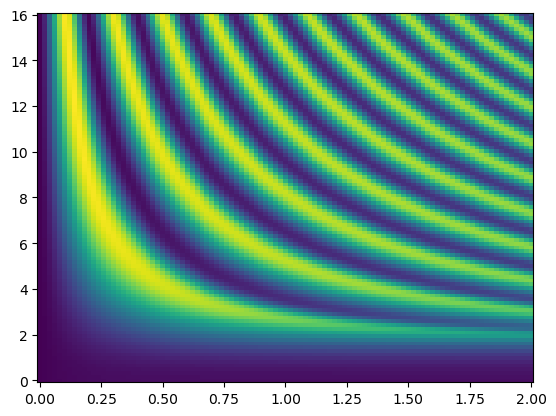

In [4]:
Delta = 0
gamma_e = 6.7
gamma_f = 0.25
t_list = np.linspace(0,2,101)
J_list = np.linspace(0,16,100)
t_grid, J_grid = np.meshgrid(t_list, J_list)
Pg_grid = np.zeros(J_grid.shape)
Pe_grid = np.zeros(J_grid.shape)
Pf_grid = np.zeros(J_grid.shape)

for J_idx, J in enumerate(J_list):
    H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta/2*Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    psi0 = basis(3,2)
    result = mesolve(H, psi0, t_list, [np.sqrt(gamma_e)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_f)*Qobj([[0,0,0],[0,0,1],[0,0,0]])], [])
    Pg_grid[J_idx,:] = expect(Qobj([[1,0,0],[0,0,0],[0,0,0]]),result.states)
    Pe_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,1,0],[0,0,0]]),result.states)
    Pf_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,0,0],[0,0,1]]),result.states)

# plt.plot(t_list,Pg_grid[50,:])
# plt.plot(t_list,Pe_grid[50,:])
# plt.plot(t_list,Pf_grid[50,:])
# plt.contourf(t_grid,J_grid,(Pe_grid-Pf_grid))
plt.pcolormesh(t_grid,J_grid,(Pe_grid-Pf_grid)/(Pe_grid+Pf_grid))
plt.savefig('2a')

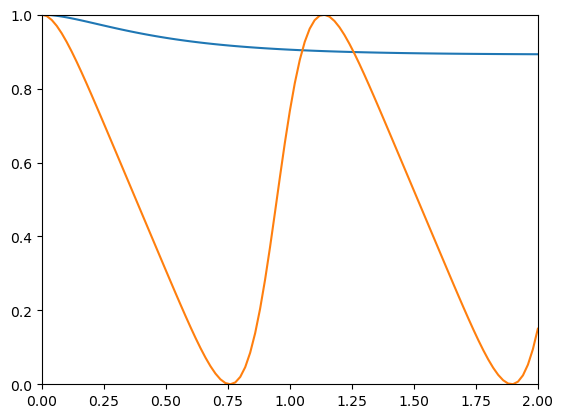

In [5]:
Delta = 0
gamma_e = 1.61*4
gamma_f = 0
t_list = np.linspace(0,2,101)
J_list = [1,3.2]
t_grid, J_grid = np.meshgrid(t_list, J_list)
Pg_grid = np.zeros(J_grid.shape)
Pe_grid = np.zeros(J_grid.shape)
Pf_grid = np.zeros(J_grid.shape)
Pn_grid = np.zeros(J_grid.shape)

for J_idx, J in enumerate(J_list):
    H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta/2*Qobj([[0,0,0],[0,1,0],[0,0,-1]])
    psi0 = basis(3,2)
    result = mesolve(H, psi0, t_list, [np.sqrt(gamma_e)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_f)*Qobj([[0,0,0],[0,0,1],[0,0,0]])], [])
    Pg_grid[J_idx,:] = expect(Qobj([[1,0,0],[0,0,0],[0,0,0]]),result.states)
    Pe_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,1,0],[0,0,0]]),result.states)
    Pf_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,0,0],[0,0,1]]),result.states)
    Pn_grid[J_idx,:] = expect(Qobj([[0,0,0],[0,1,0],[0,0,1]]),result.states)

plt.plot(t_list,Pf_grid[0,:]/Pn_grid[0,:])
plt.plot(t_list,Pf_grid[1,:]/Pn_grid[1,:])
plt.axis([0,2,0,1])
plt.savefig('2c')

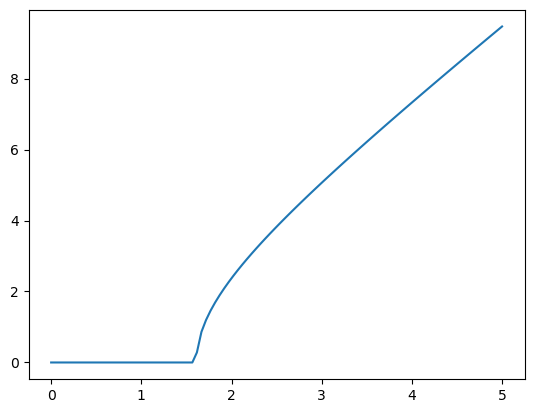

In [6]:
J = np.linspace(0,5,100)
gamma = 1.61*4
Delta = 0
Dlambda_real = np.real(np.sqrt(16*J**2 + (2*Delta-1j*gamma)**2)/2)
plt.plot(J, Dlambda_real)

plt.savefig('2d')

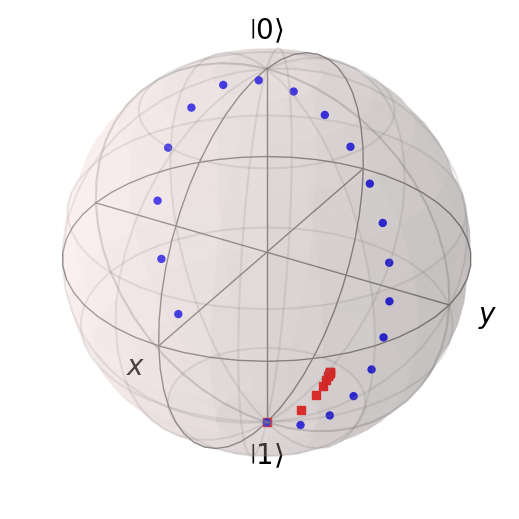

In [7]:
Delta = 0
gamma = 7
gamma_f = 0.25
gamma_e = gamma+gamma_f
Jt = 0.4*gamma

b = Bloch()
b.make_sphere()

J = gamma
t_list = np.linspace(0,Jt/J,20)
H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
psi0 = basis(3,2)
result = mesolve(H, psi0, t_list, [np.sqrt(gamma_e)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_f)*Qobj([[0,0,0],[0,0,1],[0,0,0]])], 
                    [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,1],[0,1,0]]),np.sqrt(2)*Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])
b.add_points([result.expect[1]/result.expect[0],result.expect[2]/result.expect[0],result.expect[3]/result.expect[0]])

J = gamma/5
t_list = np.linspace(0,Jt/J,10)
H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
psi0 = basis(3,2)
result = mesolve(H, psi0, t_list, [np.sqrt(gamma_e)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_f)*Qobj([[0,0,0],[0,0,1],[0,0,0]])], 
                    [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,1],[0,1,0]]),Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])
b.add_points([result.expect[1]/result.expect[0],result.expect[2]/result.expect[0],result.expect[3]/result.expect[0]])

b.render()
b.show()

/home/archen/.conda/envs/ece456/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


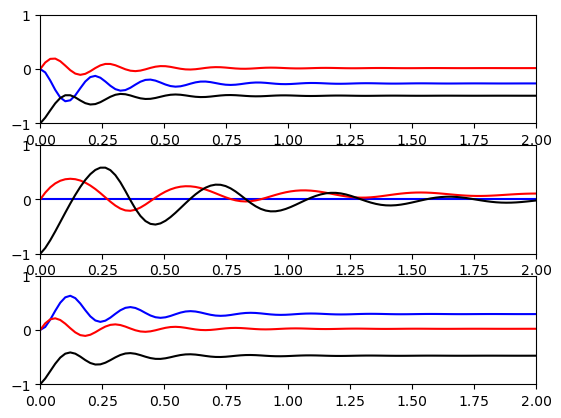

In [8]:
Delta = -4*2*np.pi
gamma_fe = 2
gamma_fg = 0
gamma_eg = 7.1+gamma_fe
J = 6.9
t_list = np.linspace(0,2,100)

H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
psi0 = basis(3,2)
result = mesolve(H, psi0, t_list, [np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]]), np.sqrt(gamma_fg)*Qobj([[0,0,0],[0,0,0],[0,0,1]])], 
                    [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,1],[0,1,0]]),Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])

fig,ax = plt.subplots(3)
ax[0].plot(t_list,-result.expect[1]/result.expect[0],color='blue')
ax[0].plot(t_list,result.expect[2]/result.expect[0],color='red')
ax[0].plot(t_list,result.expect[3]/result.expect[0],color='black')

Delta = 0*2*np.pi
gamma_fe = 2
gamma_fg = 0
gamma_eg = 7.1+gamma_fe
J = 6.9
t_list = np.linspace(0,2,100)

H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
psi0 = basis(3,2)
result = mesolve(H, psi0, t_list, [np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]]), np.sqrt(gamma_fg)*Qobj([[0,0,0],[0,0,0],[0,0,1]])], 
                    [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,1],[0,1,0]]),Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])

ax[1].plot(t_list,-result.expect[1]/result.expect[0],color='blue')
ax[1].plot(t_list,result.expect[2]/result.expect[0],color='red')
ax[1].plot(t_list,result.expect[3]/result.expect[0],color='black')

Delta = 3.5*2*np.pi
gamma_fe = 2
gamma_fg = 0
gamma_eg = 7.1+gamma_fe
J = 6.9
t_list = np.linspace(0,2,100)

H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
psi0 = basis(3,2)
result = mesolve(H, psi0, t_list, [np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]]), np.sqrt(gamma_fg)*Qobj([[0,0,0],[0,0,0],[0,0,1]])], 
                    [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,1],[0,1,0]]),Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])

ax[2].plot(t_list,-result.expect[1]/result.expect[0],color='blue')
ax[2].plot(t_list,result.expect[2]/result.expect[0],color='red')
ax[2].plot(t_list,result.expect[3]/result.expect[0],color='black')

ax[0].axis([0,2,-1,1])
ax[1].axis([0,2,-1,1])
ax[2].axis([0,2,-1,1])

plt.savefig('4a')

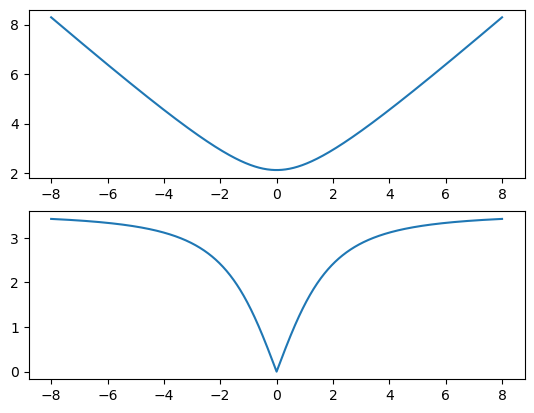

In [9]:
J = 6.9
gamma = 7.1
Delta = np.linspace(-8,8,1001)*2*np.pi
Dlambda_real = np.real(np.sqrt(16*J**2 + (2*Delta-1j*gamma)**2)/2)

fig,ax = plt.subplots(2)
ax[0].plot(Delta/(2*np.pi), Dlambda_real/(2*np.pi))

J = 6.9
gamma = 7.1
Delta = np.linspace(-8,8,1001)*2*np.pi
Dlambda_im = np.abs(np.imag(np.sqrt(16*J**2 + (2*Delta-1j*gamma)**2)/2))
ax[1].plot(Delta/(2*np.pi), Dlambda_im)

plt.savefig('4b')

In [10]:
Delta_list = np.linspace(-4,4,101)*2*np.pi
J_list = np.linspace(0,8,100)
gamma_fe = 2.25
gamma_eg = 7.1
t = np.linspace(0,2,10)

[J_grid, Delta_grid] = np.meshgrid(J_list, Delta_list)
X_grid = np.zeros(np.shape(J_grid))
Y_grid = np.zeros(np.shape(J_grid))
Z_grid = np.zeros(np.shape(J_grid))
for J_idx, J in enumerate(J_list):
    for Delta_idx, Delta in enumerate(Delta_list):
        H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
        psi0 = basis(3,2)
        result = mesolve(H, psi0, t, [np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]])], 
                            [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,1],[0,1,0]]),Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])
        X_grid[Delta_idx][J_idx] = result.expect[1][-1]
        Y_grid[Delta_idx][J_idx] = result.expect[2][-1]
        Z_grid[Delta_idx][J_idx] = result.expect[3][-1]

fig,ax = plt.subplots(3)
ax[0].pcolormesh(J_grid, Delta_grid, X_grid)

ax[1].pcolormesh(J_grid, Delta_grid, Y_grid)

ax[2].pcolormesh(J_grid, Delta_grid, Z_grid)
plt.savefig('4c')

/tmp/ipykernel_3041/782365219.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  Y_grid[Delta_idx][J_idx] = result.expect[2][-1]


KeyboardInterrupt: 

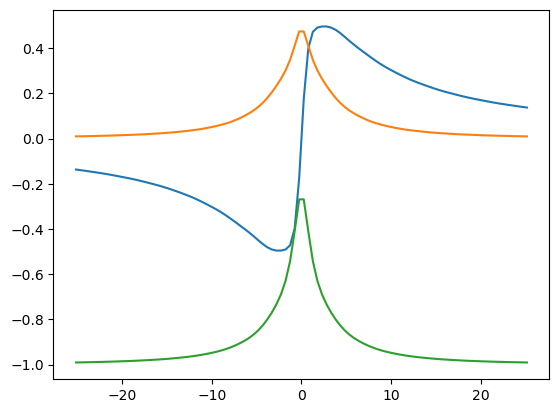

In [11]:
Delta_list = np.linspace(-4,4,100)*2*np.pi
gamma_fe = 0
gamma_eg = 7.1
J_list = [(gamma_eg-gamma_fe)/4]
t = np.linspace(0,2,10)

[J_grid, Delta_grid] = np.meshgrid(J_list, Delta_list)
X_grid = np.zeros(np.shape(J_grid))
Y_grid = np.zeros(np.shape(J_grid))
Z_grid = np.zeros(np.shape(J_grid))
for J_idx, J in enumerate(J_list):
    for Delta_idx, Delta in enumerate(Delta_list):
        H = J*Qobj([[0,0,0],[0,0,1],[0,1,0]])+Delta*Qobj([[0,0,0],[0,1,0],[0,0,0]])
        psi0 = basis(3,2)
        result = mesolve(H, psi0, t, [np.sqrt(gamma_eg)*Qobj([[0,1,0],[0,0,0],[0,0,0]]), np.sqrt(gamma_fe)*Qobj([[0,0,0],[0,0,1],[0,0,0]])], 
                            [Qobj([[0,0,0],[0,1,0],[0,0,1]]),Qobj([[0,0,0],[0,0,-1],[0,-1,0]]),Qobj([[0,0,0],[0,-1j,0],[0,1j,0]]),Qobj([[0,0,0],[0,1,0],[0,0,-1]])])
        X_grid[Delta_idx][J_idx] = result.expect[1][-1]/result.expect[0][-1]
        Y_grid[Delta_idx][J_idx] = np.real(result.expect[2][-1]/result.expect[0][-1])
        Z_grid[Delta_idx][J_idx] = result.expect[3][-1]/result.expect[0][-1]

plt.plot(Delta_grid, X_grid)
plt.plot(Delta_grid, Y_grid)
plt.plot(Delta_grid, Z_grid)

# plt.savefig('4d')